In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [5]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [6]:
import pandas as pd
from PIL import Image as ima
import warnings

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [12]:
at = pd.read_csv('/home/yelhe/script/mt/output/accidenttime_update.csv')

In [14]:
at.columns

Index(['Nr', 'Datum', 'Zeit', 'Date', 'year', 'month', 'day', 'week',
       'weekday', 'Time', 'hour'],
      dtype='object')

In [15]:
act = at[['Nr', 'Date', 'year', 'month', 'day', 'week', 'weekday', 'hour']]
# weekday 0:Monday 1: Tuesday; 2:Wednesday;  3: Thursday  4:Friday 5:Saturday 6:Sunday

In [17]:
acym = act.groupby(['year', 'month']).size().reset_index().rename(columns={0:'count'})

In [20]:
acym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    45 non-null     int64
 1   month   45 non-null     int64
 2   count   45 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [25]:
acym['M'] = acym.agg('{0[year]} - {0[month]}'.format, axis=1)

In [40]:
acym['M'] = pd.to_datetime(acym['M'])

datetime64[ns]


/sctmp/yelhe/ipykernel_854454/2759735962.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acym['M'] = pd.to_datetime(acym['M'])


In [60]:
acym['count'].max()

22

In [41]:
acym = acym.set_index('M')

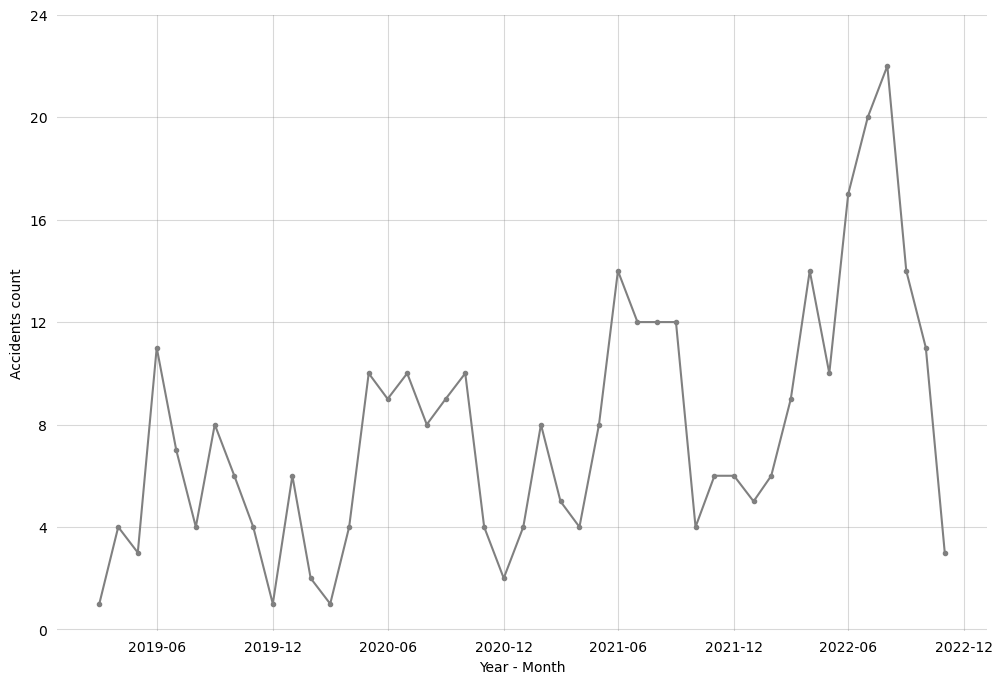

In [79]:
plt.figure(figsize = (12,8))
plt.plot(acym.index, acym['count'], color = 'grey', linestyle = '-', marker = '.' )
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Year - Month')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(0, 28, step = 4))
plt.box(False)
plt.savefig('time_ymonth.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [66]:
ach = act.groupby(['hour']).size().reset_index().rename(columns={0:'count'})

In [69]:
ach = ach.set_index('hour')

In [73]:
ach['count'].max()

28

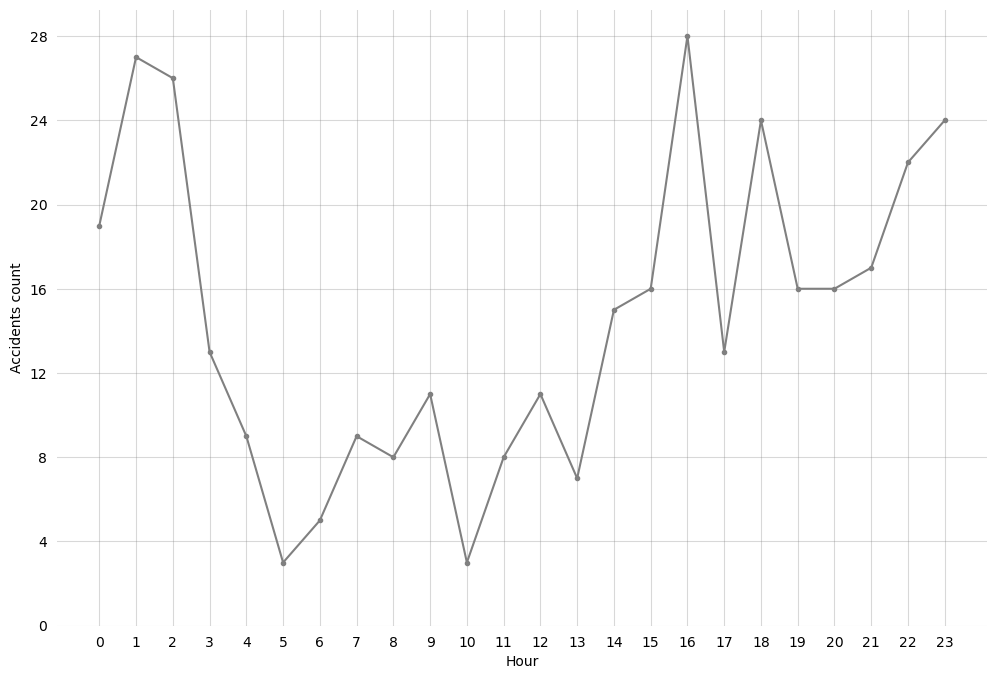

In [112]:
plt.figure(figsize = (12,8))
plt.plot(ach.index, ach['count'], color = 'grey', linestyle = '-', marker = '.' )
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Hour')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(0, 32, step = 4))
plt.xticks(np.arange(0, 24, step = 1))
plt.box(False)
plt.savefig('time_hour.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [77]:
acm = act.groupby(['month']).size().reset_index().rename(columns={0:'count'})
acm = acm.set_index('month')
acm['count'].max()

51

In [230]:
acm

,count
month,
1,9
2,15
3,16
4,16
5,26
6,31
7,51
8,49
9,46


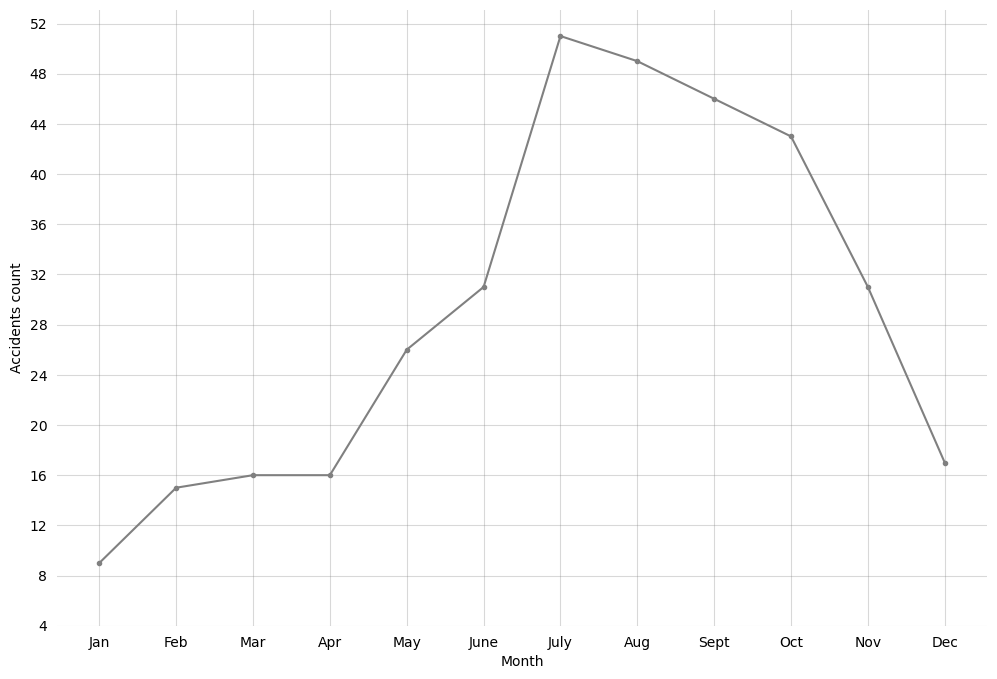

In [139]:
plt.figure(figsize = (12,8))
plt.plot(acm.index, acm['count'], color = 'grey', linestyle = '-', marker = '.' )
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Month')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(4, 56, step = 4))
plt.xticks(np.arange(1, 13, step = 1),['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.box(False)
plt.savefig('time_month.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [92]:
acwd = act.groupby(['weekday']).size().reset_index().rename(columns={0:'count'})
acwd = acwd.set_index('weekday')
acwd['count'].max()

79

In [93]:
acwd
# weekday 0:Monday 1: Tuesday; 2:Wednesday;  3: Thursday  4:Friday 5:Saturday 6:Sunday

,count
weekday,
0,38
1,48
2,44
3,39
4,48
5,79
6,54


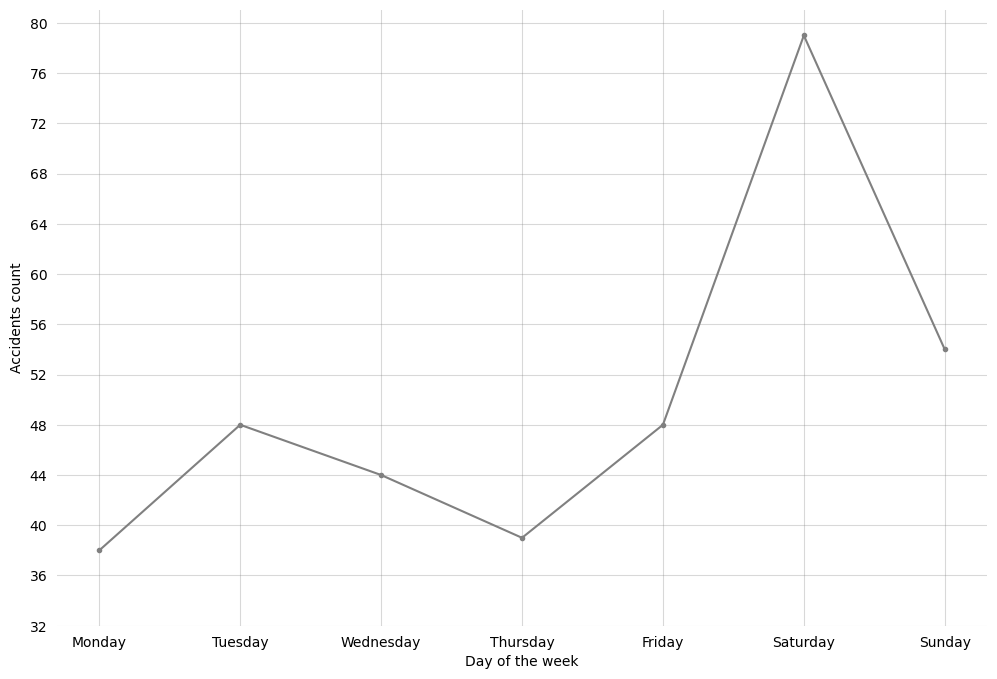

In [113]:
plt.figure(figsize = (12,8))
plt.plot(acwd.index, acwd['count'], color = 'grey', linestyle = '-', marker = '.' )
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Day of the week')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(32, 84, step = 4))
plt.xticks(np.arange(0, 7, step = 1),['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.box(False)
plt.savefig('time_weekday.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [99]:
act

,Nr,Date,year,month,day,week,weekday,hour
0,99900060852597,2022-05-29,2022,5,29,21,6,0
1,99900063018611,2022-10-12,2022,10,12,41,2,17
2,99900052723510,2020-10-26,2020,10,26,44,0,16
3,99900061514043,2022-07-08,2022,7,8,27,4,21
4,99900063037843,2022-10-13,2022,10,13,41,3,19
...,...,...,...,...,...,...,...,...
345,99900055905276,2021-06-08,2021,6,8,23,1,12
346,99900060670975,2022-05-16,2022,5,16,20,0,14
347,99900047367168,2019-09-21,2019,9,21,38,5,13
348,99900050714619,2020-06-06,2020,6,6,23,5,16


In [102]:
acweek = act.loc[(act['weekday'] == 0) |
                 (act['weekday'] == 1) |
                 (act['weekday'] == 2) |
                 (act['weekday'] == 3) |
                 (act['weekday'] == 4)]

In [104]:
acweekend = act.loc[(act['weekday'] == 5) |
                    (act['weekday'] == 6)]

In [105]:
acwd_h = acweek.groupby(['hour']).size().reset_index().rename(columns={0:'count'})
acwd_h = acwd_h.set_index('hour')
acwd_h['count'].max()

23

In [106]:
acwk_h = acweekend.groupby(['hour']).size().reset_index().rename(columns={0:'count'})
acwk_h = acwk_h.set_index('hour')
acwk_h['count'].max()

18

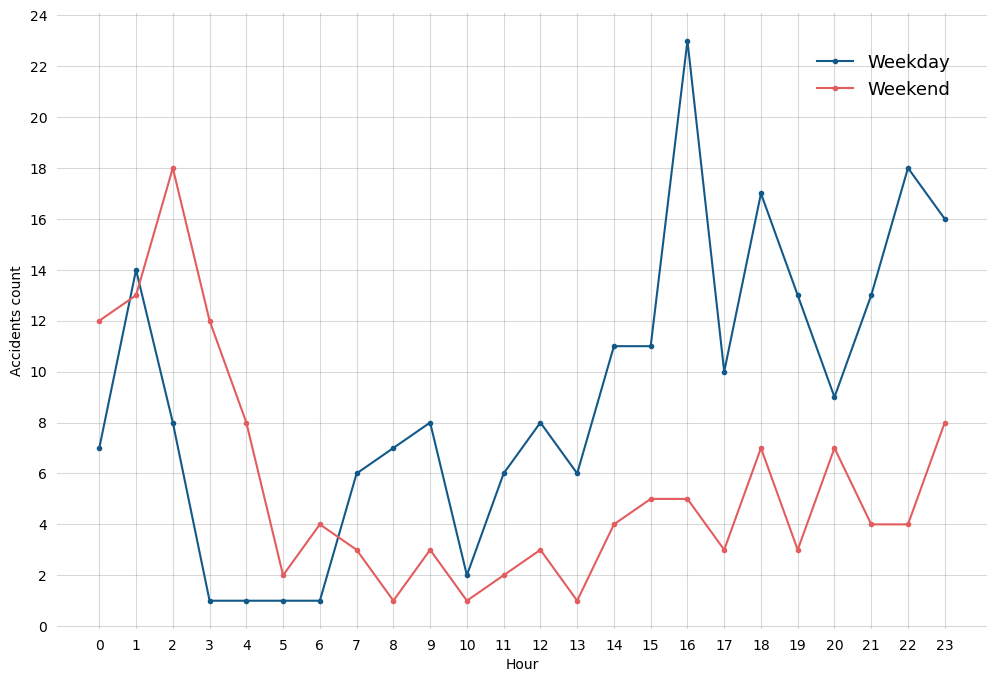

In [135]:
plt.figure(figsize = (12,8))
plt.plot(acwd_h.index, acwd_h['count'], color = '#125989', linestyle = '-', marker = '.',
         label = 'Weekday')
plt.plot(acwk_h.index, acwk_h['count'], color = '#e35c5e', linestyle = '-', marker = '.',
         label = 'Weekend')
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Hour')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(0, 26, step = 2))
plt.xticks(np.arange(0, 24, step = 1))
plt.legend(frameon = False, loc = 'upper left', bbox_to_anchor = (0.8, 0.96), fontsize = 13)
plt.box(False)
plt.savefig('time_hour_wdwk.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [140]:
acy = act.groupby(['year']).size().reset_index().rename(columns={0:'count'})
acy = acy.set_index('year')
acy['count'].max()

137

In [229]:
acy['count']

year
2019     48
2020     74
2021     91
2022    137
Name: count, dtype: int64

In [141]:
acy['count'].min()

48

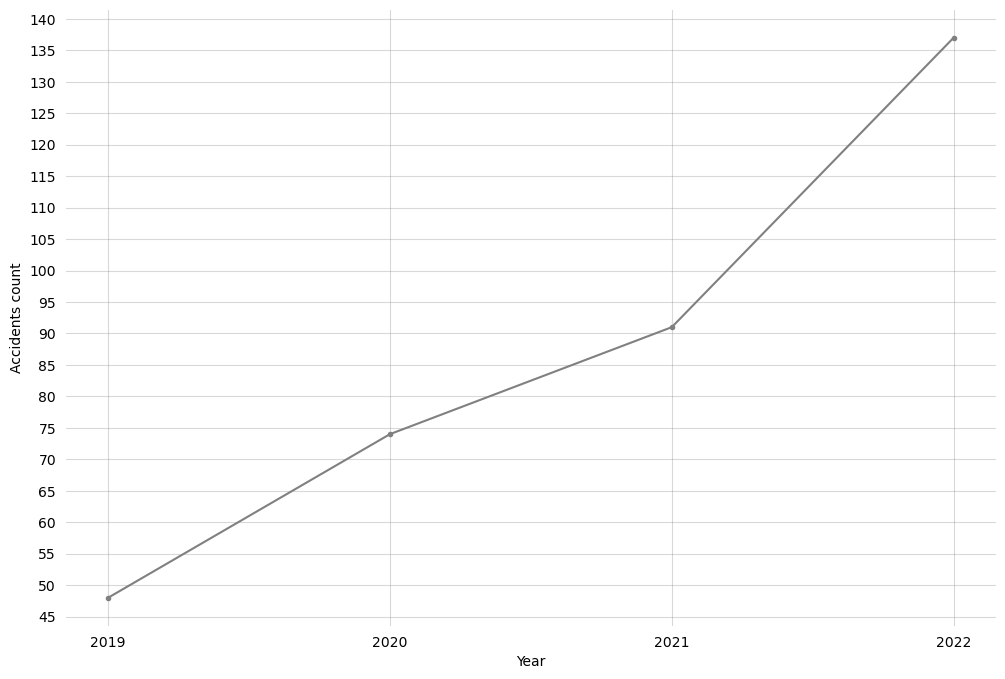

In [148]:
plt.figure(figsize = (12,8))
plt.plot(acy.index, acy['count'], color = 'grey', linestyle = '-', marker = '.' )
plt.grid(axis = 'both', color = 'grey', alpha = 0.3)
plt.xlabel('Year')
plt.ylabel('Accidents count')
plt.tick_params(left = False, bottom = False )
plt.yticks(np.arange(45, 145, step = 5))
plt.xticks(np.arange(2019, 2023, step = 1))
plt.box(False)
plt.savefig('time_year.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [150]:
actdate = act.groupby(['Date']).size().reset_index().rename(columns={0:'count'})
actdate.set_index('Date')
actdate['count'].max()

4

In [154]:
from statsmodels.tsa.seasonal import STL

In [179]:
import statsmodels.tsa.seasonal as stse

In [155]:
actdate

,Date,count
0,2019-04-08,1
1,2019-05-22,2
2,2019-05-25,1
3,2019-05-30,1
4,2019-06-07,1
...,...,...
292,2022-11-22,1
293,2022-11-26,1
294,2022-11-27,1
295,2022-12-15,1


In [168]:
tsm = pd.Series(acym['count'], index = pd.date_range(start = '4/1/2019', 
                                                     end = '12/1/2022', freq = 'MS'))

/sctmp/yelhe/ipykernel_854454/824733508.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


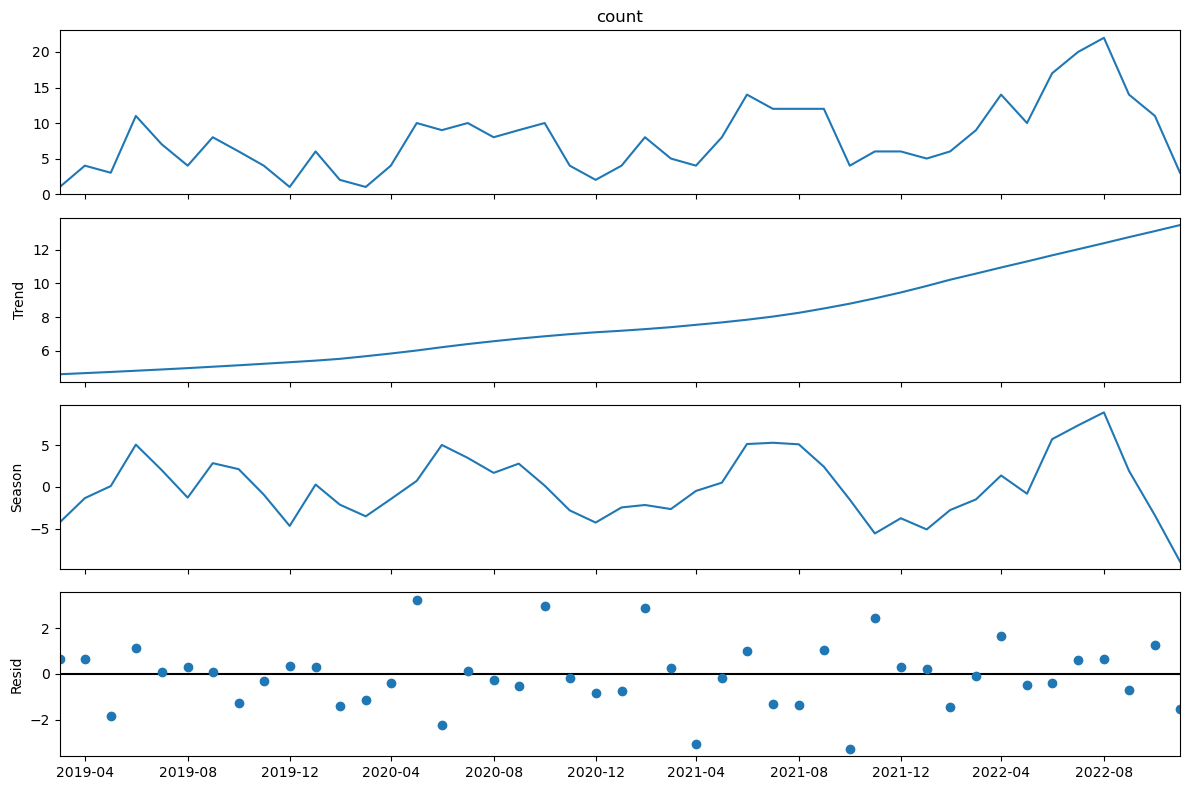

In [193]:
stl = STL(tsm)
res = stl.fit()
# fig = res.plot()
# fig.set_size_inches((12,8))
# fig.tight_layout()
# plt.show()

In [219]:
tsm

2019-04-01     1
2019-05-01     4
2019-06-01     3
2019-07-01    11
2019-08-01     7
2019-09-01     4
2019-10-01     8
2019-11-01     6
2019-12-01     4
2020-01-01     1
2020-02-01     6
2020-03-01     2
2020-04-01     1
2020-05-01     4
2020-06-01    10
2020-07-01     9
2020-08-01    10
2020-09-01     8
2020-10-01     9
2020-11-01    10
2020-12-01     4
2021-01-01     2
2021-02-01     4
2021-03-01     8
2021-04-01     5
2021-05-01     4
2021-06-01     8
2021-07-01    14
2021-08-01    12
2021-09-01    12
2021-10-01    12
2021-11-01     4
2021-12-01     6
2022-01-01     6
2022-02-01     5
2022-03-01     6
2022-04-01     9
2022-05-01    14
2022-06-01    10
2022-07-01    17
2022-08-01    20
2022-09-01    22
2022-10-01    14
2022-11-01    11
2022-12-01     3
Freq: MS, Name: count, dtype: int64

In [212]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

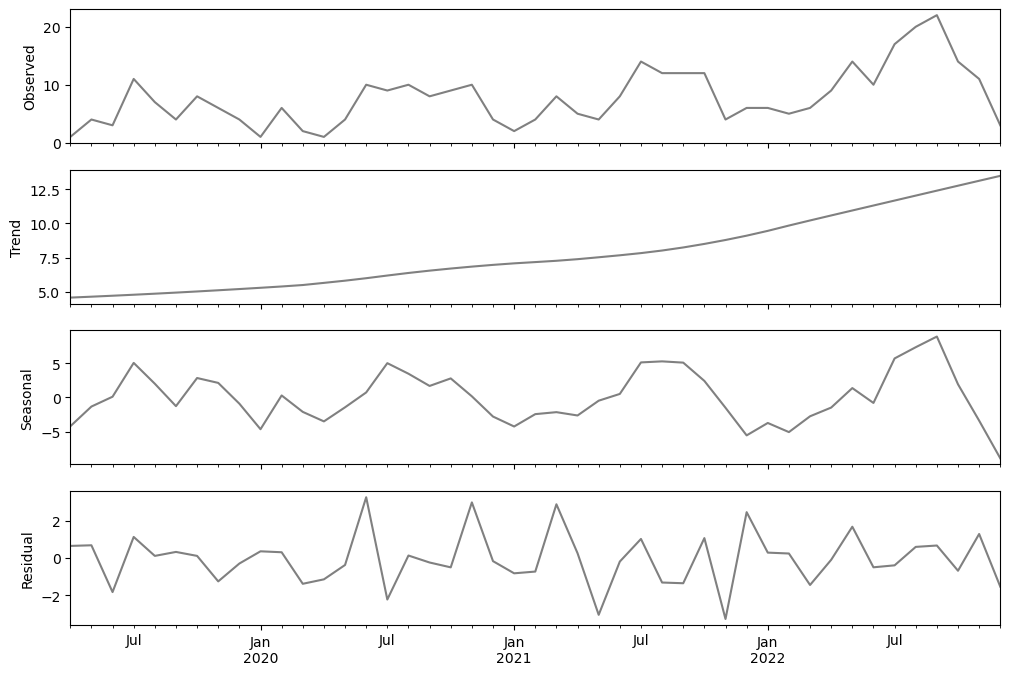

In [228]:
stl = STL(tsm)
res = stl.fit()
fig, axes = plt.subplots(4, 1, sharex=True)
fig.set_size_inches((12,8))
res.observed.plot(ax=axes[0], legend=False, color='grey')
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False, color='grey')
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False, color = 'grey')
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False, color='grey')
axes[3].set_ylabel('Residual')
# loc = mdates.MonthLocator(interval = 4)
# axes[3].xaxis.set_minor_locator(loc)
# axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig('time_decompositin.png', dpi = 150, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [276]:
import statsmodels.api as sm
from matplotlib.collections import PolyCollection

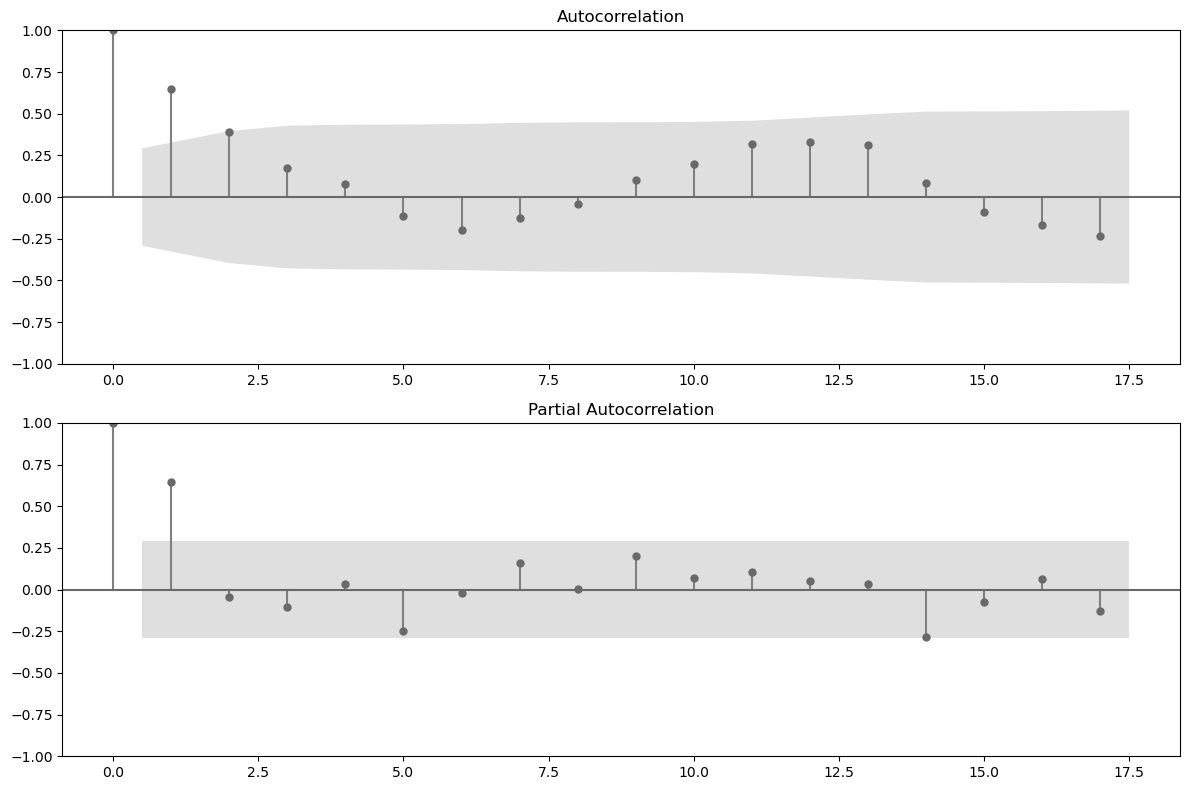

In [283]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Notice that the shadow is the 95% confidence interval that if a point follows in the shadow, the lag has NO significant correlation. 

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches((12,8))
# plot_acf(tsm, ax=axes[0])
# plot_pacf(tsm, ax=axes[1])
# plot_acf(dummy_season, ax=axes[1], title='season', color = 'grey')
# plot_acf(dummy_whitenoise, ax=axes[2], title='white noise', color = 'grey')
#change the color of the vlines
sm.graphics.tsa.plot_acf(tsm.squeeze(),  ax=axes[0], color='dimgrey', vlines_kwargs={"colors": "grey"})
sm.graphics.tsa.plot_pacf(tsm.squeeze(),  ax=axes[1], color='dimgrey', vlines_kwargs={"colors": "grey"})
#get polygon patch collections and change their color
for item in axes[0].collections:
    if type(item)==PolyCollection:
        item.set_facecolor('grey')
for item in axes[1].collections:
    if type(item)==PolyCollection:
        item.set_facecolor('grey')
plt.tight_layout()
plt.savefig('acfpacf.png', dpi = 200, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')
# plt.show()

In [247]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(tsm, order=(1, 1, 1)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.122
Date:                Wed, 24 Apr 2024   AIC                            246.244
Time:                        09:22:48   BIC                            251.596
Sample:                    04-01-2019   HQIC                           248.229
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6849      0.242      2.832      0.005       0.211       1.159
ma.L1         -0.9560      0.125     -7.623      0.000      -1.202      -0.710
sigma2        13.4725      3.429      3.929      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


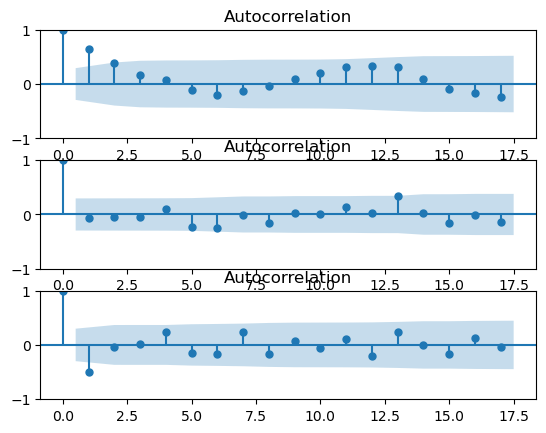

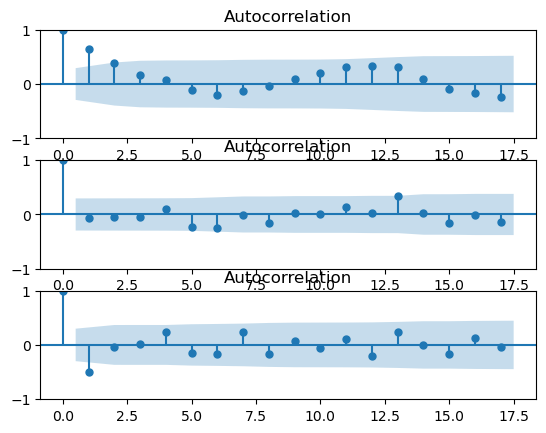

In [250]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(tsm, ax=ax1)
plot_acf(tsm.diff().dropna(), ax=ax2)
plot_acf(tsm.diff().diff().dropna(), ax=ax3)

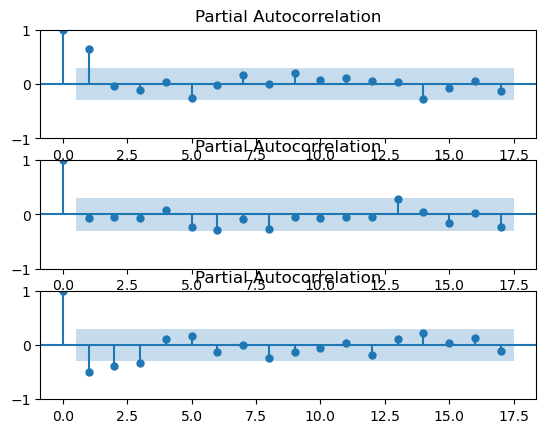

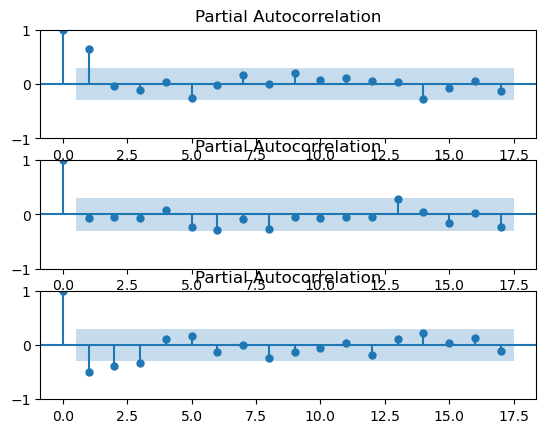

In [249]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_pacf(tsm, ax=ax1)
plot_pacf(tsm.diff().dropna(), ax=ax2)
plot_pacf(tsm.diff().diff().dropna(), ax=ax3)

In [252]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tsm)
print(f'p-value: {result[1]}')

# After the 1st-order difference, the p-value is <0.001, thus, we can set d = 1
result = adfuller(tsm.dropna())
print(f'p-value: {result[1]}')

result = adfuller(tsm.diff().dropna())
print(f'p-value: {result[1]}')

p-value: 0.005220892741327354
p-value: 0.005220892741327354
p-value: 0.0005728005276988165


In [254]:
# Ma(2)
model1 = ARIMA(tsm, order=(0, 2, 2)) 
model1_fit = model1.fit()
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                   45
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -121.953
Date:                Wed, 24 Apr 2024   AIC                            249.905
Time:                        09:48:17   BIC                            255.189
Sample:                    04-01-2019   HQIC                           251.854
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0552      7.643     -0.138      0.890     -16.035      13.924
ma.L2          0.0562      0.388      0.145      0.885      -0.705       0.817
sigma2        15.5585    119.615      0.130      0.8

In [191]:
stl2 = STL(tsm, robust = True)
res2 = stl2.fit()
res2.plot()

TypeError: DecomposeResult.plot() got an unexpected keyword argument 'color'

<Figure size 1200x800 with 0 Axes>

In [186]:
res1 = stse.seasonal_decompose(tsm)

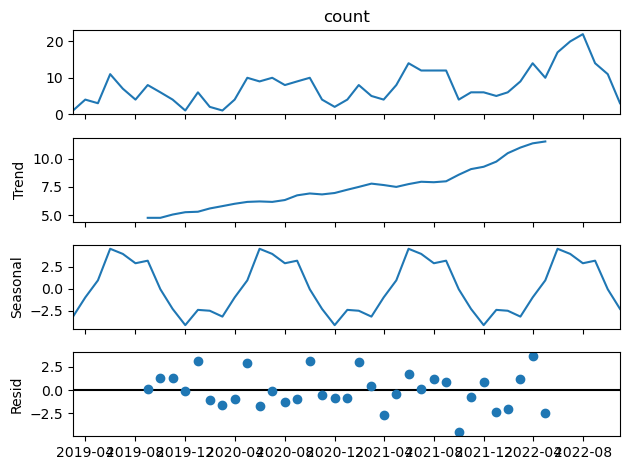

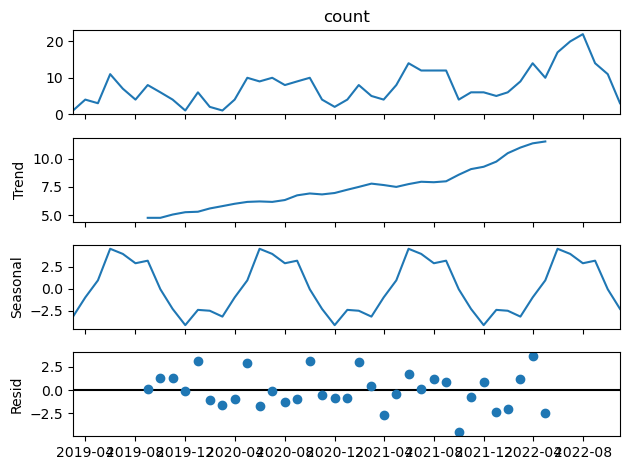

In [187]:
res1.plot()

In [200]:
# acym.to_csv('/home/yelhe/script/mt/output/accident_time_yearmonth.csv')